<h1>Final Project Part 2 - EDA </h1>

<h2>Import Libraries and Loading Datasets</h2>

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 
sns.set_style("darkgrid")      # Specifying seaborn style to use for plots/graphs

%matplotlib inline

In [78]:
# Load Red Wine and White Wine Datasets
df_red = pd.read_csv("Data/winequality/winequality-red.csv", sep=';')
df_white = pd.read_csv("Data/winequality/winequality-white.csv", sep=';')

# Concatenate them into a third dataframe
df_all = pd.concat([df_red, df_white])

In [79]:
# Ensure concatenation occurred correctly by looking at number of rows in all three dfs
print(df_red.shape)
print(df_white.shape)
df_all.shape

(1599, 12)
(4898, 12)


(6497, 12)

<h2>Create Preliminary Models for Data</h2>

<h4>Modeling Red Wine Dataset</h4>

In [80]:
# Splitting columns into target and features
target_col = 'quality'
feature_cols = df_red.columns.drop('quality')

X = df_red.loc[:,feature_cols]
y = df_red.loc[:,target_col]

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

# Creating a linear regression model instance and fitting the training data to it
lr_red = LinearRegression()
lr_red.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_red.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_red.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_red.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.3124928694445748
Training Data R-Squared: 0.3705714892325809
Test Data RMSE: 0.6443989524633872
Test Data MAE: 0.5077605322252643


<h4>Modeling White Wine Dataset</h4>

In [81]:
# Splitting columns into target and features 

target = 'quality'
feature_cols = df_white.columns.drop('quality')

X = df_white.loc[:,feature_cols]
y = df_white.loc[:,target]

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

# Creating a linear regression model instance and fitting the training data to it
lr_white = LinearRegression()
lr_white.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_white.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_white.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_white.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.23050953961801068
Training Data R-Squared: 0.29438870296993325
Test Data RMSE: 0.7593104616436019
Test Data MAE: 0.5858425572208114


<h4>Modeling Red and White Wine Data Together</h4>

In [82]:
# Splitting columns into target and features 

target = 'quality'
feature_cols = df_all.columns.drop('quality')

X = df_all.loc[:,feature_cols]
y = df_all.loc[:,target]

# Splitting both target and features data into a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

# Creating a linear regression model instance and fitting the training data to it
lr_all = LinearRegression()
lr_all.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_all.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_all.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_all.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.26029104320449525
Training Data R-Squared: 0.3018263071770332
Test Data RMSE: 0.7473956057705188
Test Data MAE: 0.579124363825664


<h4>Evaluation of Models</h4>

All three first-pass models are underfitting. Based on the metrics, the red wine model is fitting the 
test data (R-Squared = 0.312) slightly better than the white wine model (R-Squared = 0.230). My options would include doing a combination of the following:
<ul>
    <li>Introduce non-linearities into the model by creating new features by raising one or more features to a power.</li>
    <li>Choose a different type of model completely to see if it performs better.</li>
    <li>Drop certain features that may be irrelevant and skewing the model.</li>

<h2>Exploring The Red Wine Dataset</h2>

For this part of the project, I will perform EDA on the Red Wine dataset only (rather than on the White Wine and Combined datasets as well) with the underlying assumption that since they all share the same features, the things I learn from this EDA will apply to those datasets as well (at least as far as the relevance of features and relationships between them goes). Of course, I will be testing this assumption once I start trying to improve my models for all three datasets.

In [83]:
df_red.shape

(1599, 12)

In [84]:
df_red.dtypes # Find out the datatypes of each column

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [85]:
df_red.describe() # Basic descriptive statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h4>Observation</h4>

The descriptive statistics show that there are no missing values. All of the columns are of numerical data types. There are 1599 observations which is a small number and won't require me to sample.

<h3>Boxplots</h3>

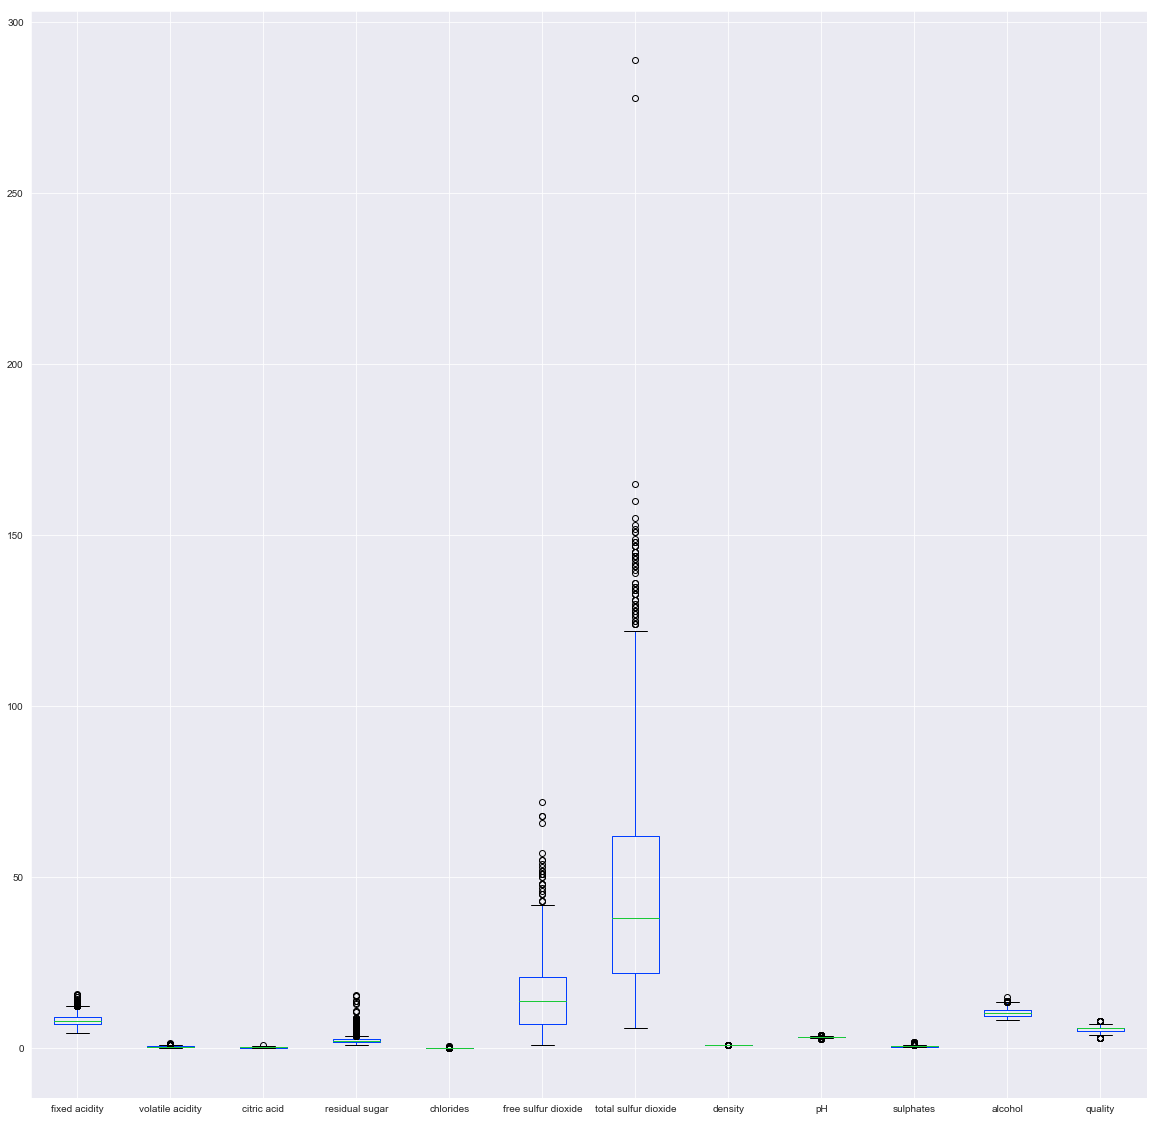

In [86]:
ax = df_red.plot(kind='box', figsize=(20, 20)) # Boxplot to visualize the data and identify outliers.

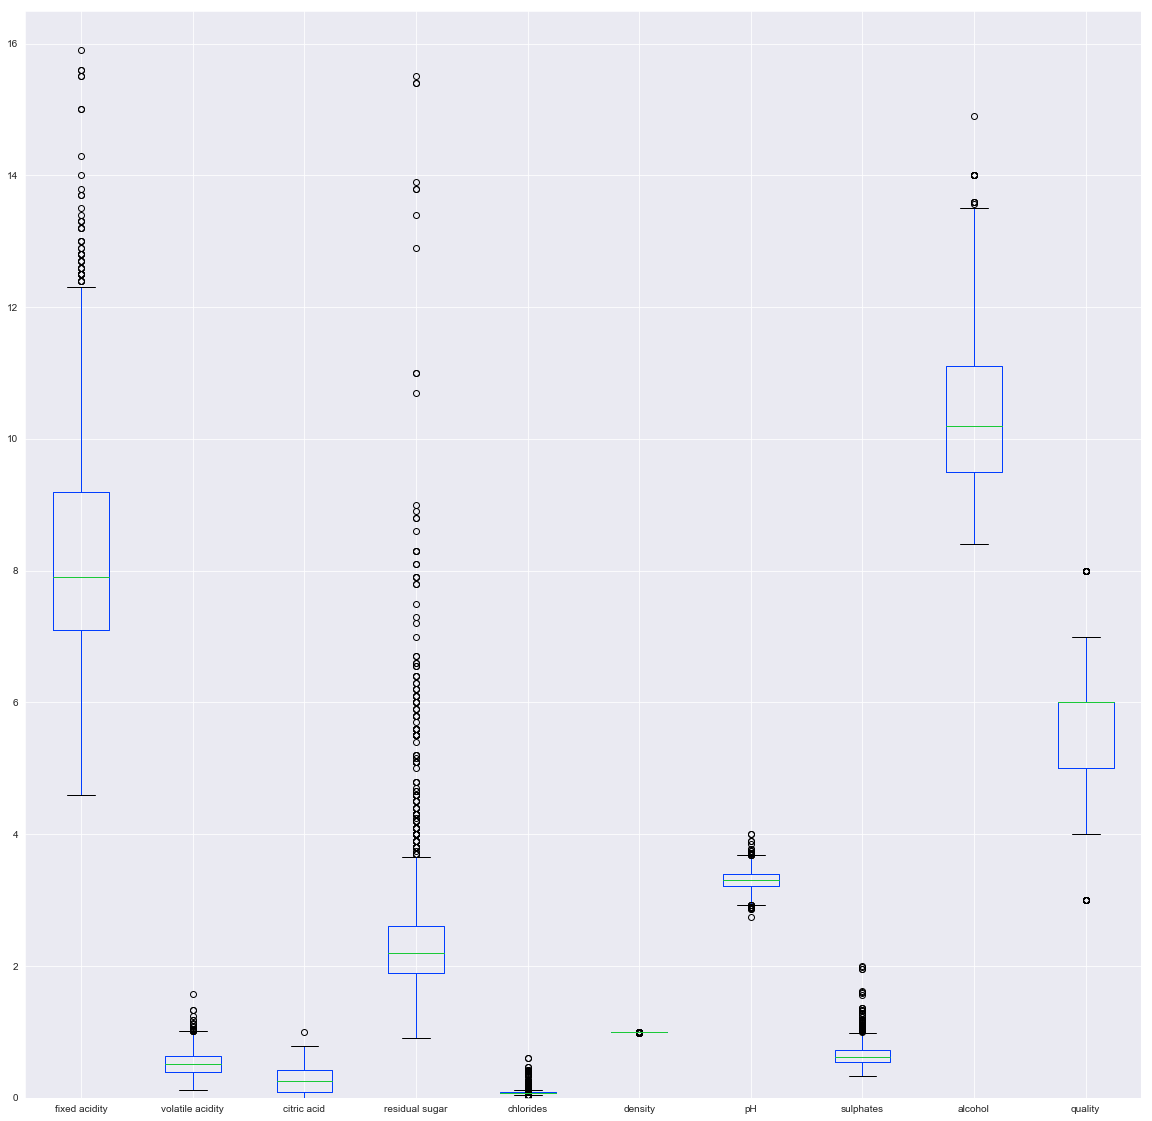

In [87]:
# New boxplot without the sulfur dioxide variables (which seem to have a drastically different scale/range from the others) 
# to more closely look at the other variables
ax2 = df_red.drop(['total sulfur dioxide','free sulfur dioxide'], axis = 1).plot(kind='box', figsize=(20, 20), grid = True) 
ax2.set_ylim(0,16.5);

<h4>Observation</h4>

Most of the variables with the exception of citric acid, density, and the target variable quality seem to have a fair number of outliers that fall beyond the whiskers of the boxplot, usually on the higher side. This suggests some skewness to me. 

<h3>Histograms</h3>

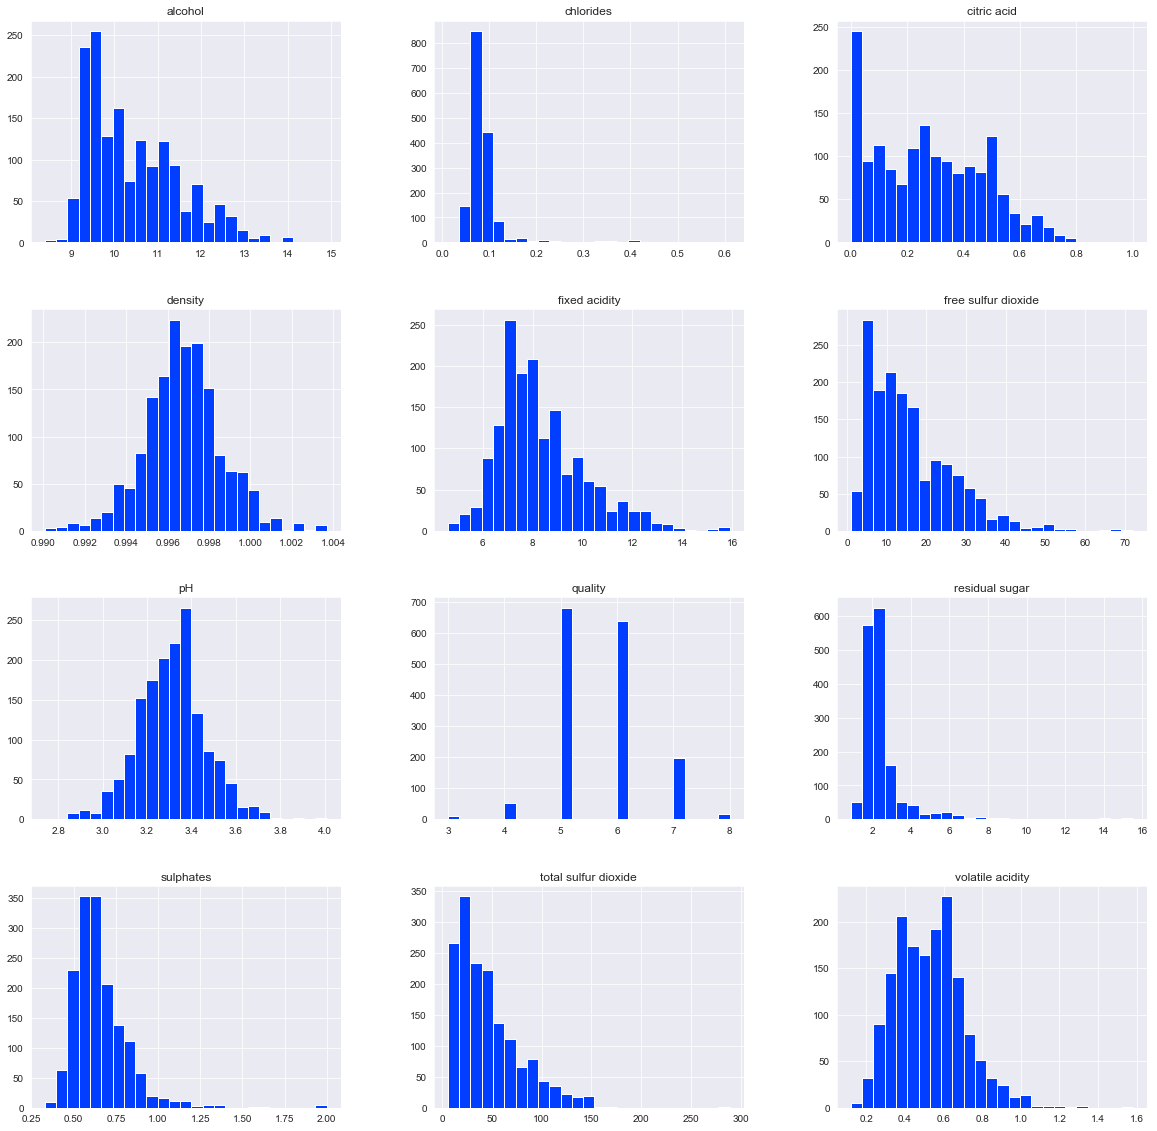

In [88]:
ax3 = df_red.hist(figsize=(20,20), bins = 25) # Visualize distributions of each column

<h4>Observation</h4>

The variables that seem to fall roughly into a normal distribution are density and possibly fixed acidity. The ones that are skewed right are alcohol, citric acid, fixed acidity, free sulphur dioxide, residual sugar, sulphates, total sulfur dioxide, and possibly volatile acidity

<h3>Using Seaborn To Visualize Relationships</h3>

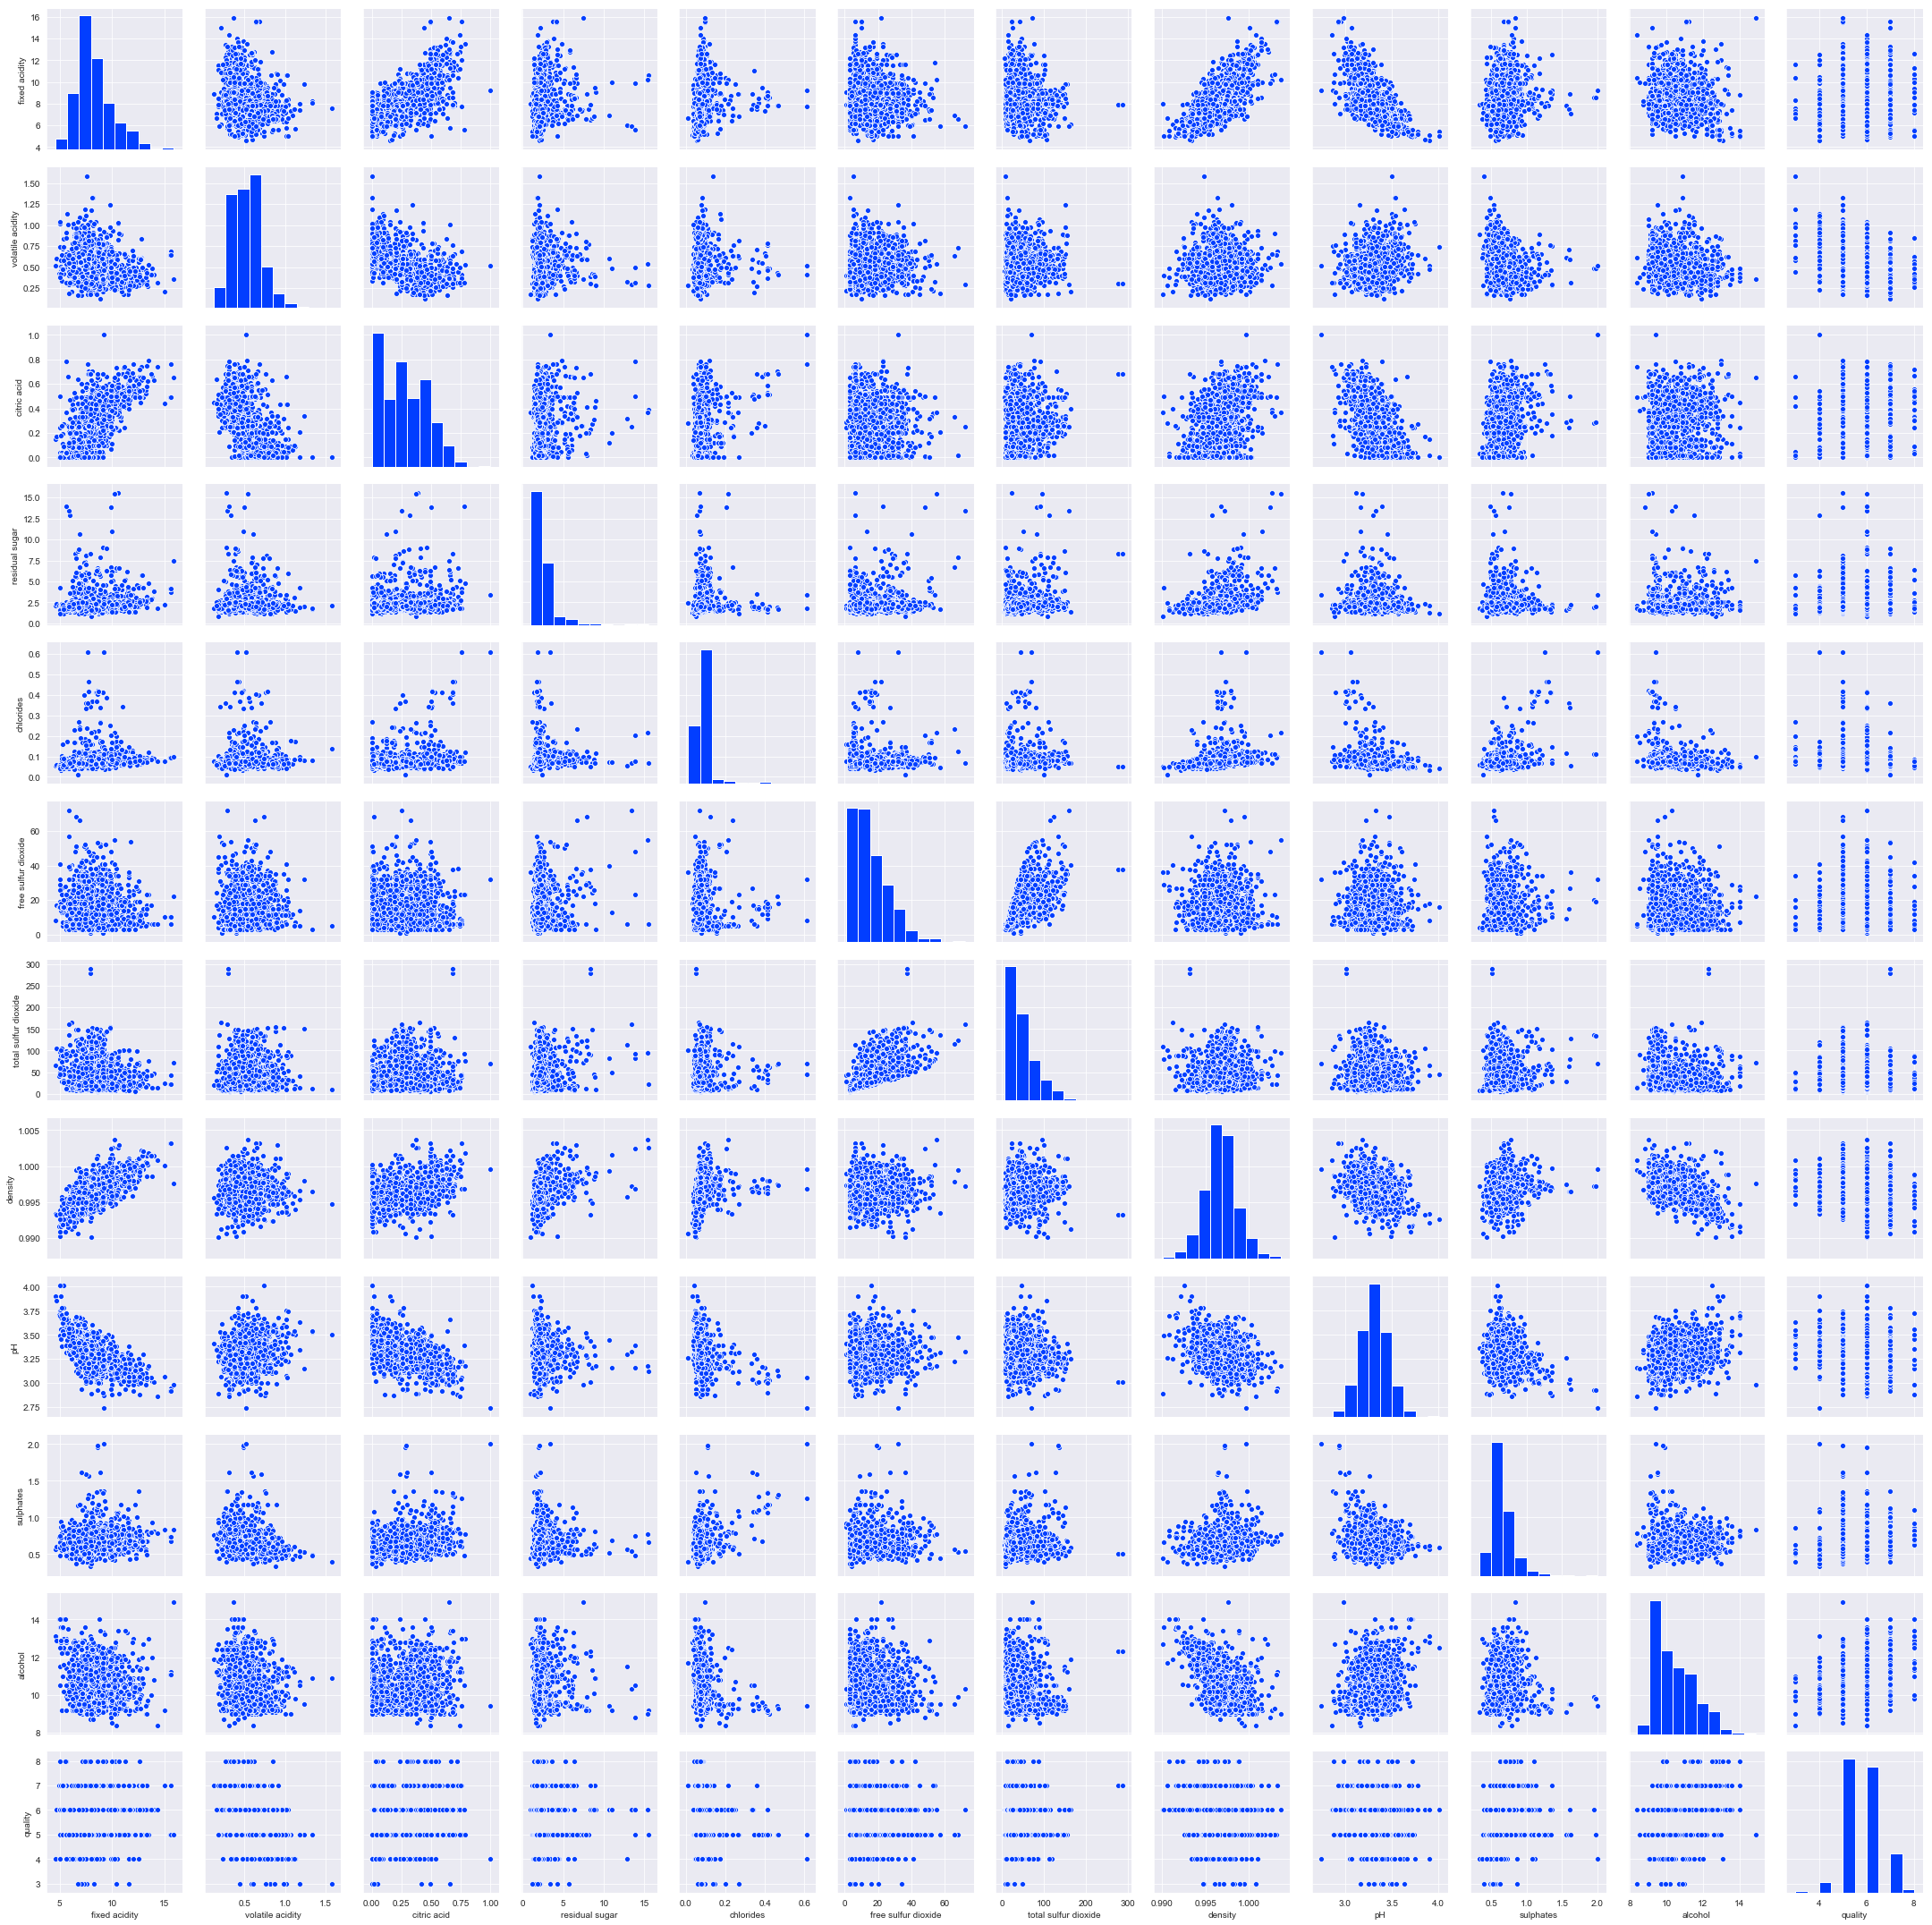

In [89]:
g = sns.pairplot(df_red) # Create scattermatrix of all variables to visualize relationships

<h4>Observation</h4>

Unfortunately, it looks like none of the variables have a linear relationship to the target variable as evidenced from the last column/bottom row of this scattermatrix so choosing a non-linear model may be more effective. Also, even though the quality variable is represented numerically, because it is discrete and not continuous, it may be more useful for me to treat this as a classification problem rather than a regression problem.

Some notable relationships I see among the feature variables is a positive correlation between total acidity and density, and a negative correlation between total acidity and pH. The latter is unsurprising as pH measures acidity! A similar relationship exists between fixed acidity and density/pH. To avoid collinearity, I will likely drop some of these variables in the final modeling.

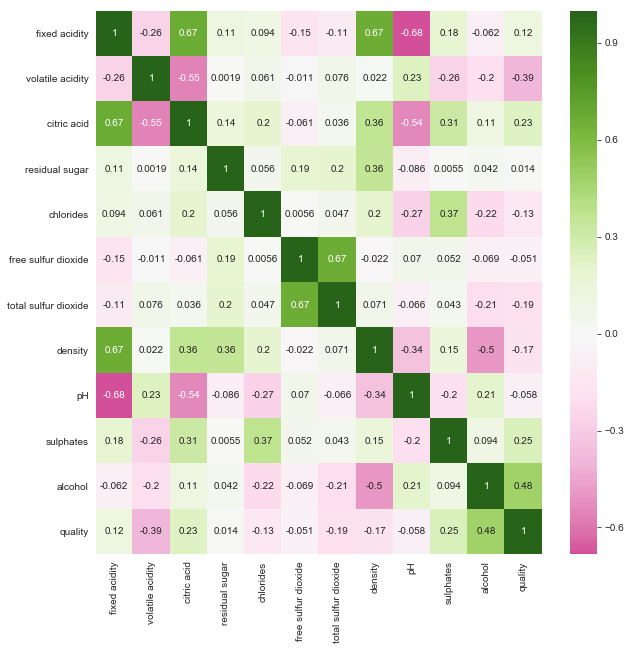

In [90]:
# Create an annotated heatmap to visualize the correlation relationships between variables

fig, ax4 = plt.subplots(figsize=(10,10))         
sns.heatmap(df_red.corr(), center=0, cmap="PiYG", annot = True, ax = ax4);

<h5>Observation</h5>

This confirms my observations from the scattermatrix that the acidity-related variables are correlated with each other (some more than others) and some correlate with the density variable as well. In feature engineering, I will need to look closely at those variables and decide which ones to drop.

Alcohol content seems to be the most positively correlated with quality (interesting!) though not a very strong correlation. Volatile acidity seems to have the highest negative correlation with quality but is also a weak correlation.

<h2>Brief Heatmap Analysis Of White Wine Data</h2>

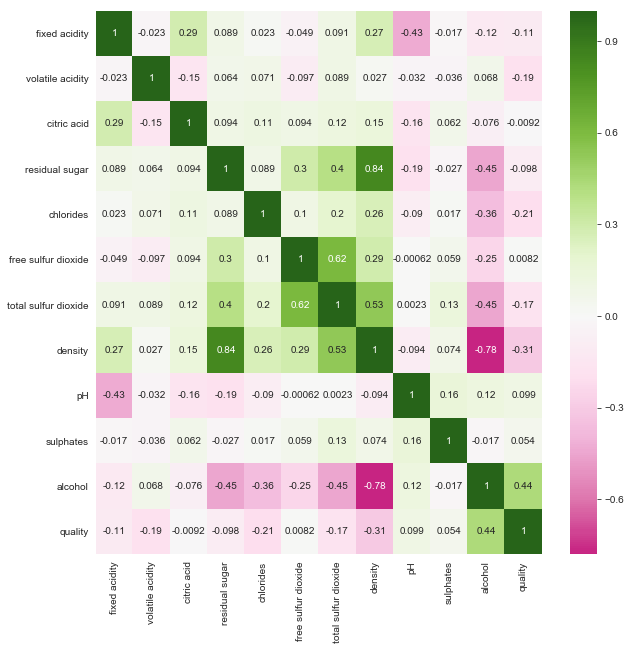

In [91]:
# Briefly create heatmap for the white wine data to see if there are any obvious differences
fig, ax5 = plt.subplots(figsize=(10,10))         
sns.heatmap(df_white.corr(), center=0, cmap="PiYG", annot = True, ax = ax5);

<h4>Observations</h4>

The correlation between acidity variables seems weaker in the white wine data.  Another difference is that there is a much stronger negative correlation between alcohol and density in the white wine data (-0.78) than the red wine data (-0.5). Further, there is a very strong positive correlation between density and sugar in the white wine data (0.84) where there was a very weak one between those variables in the red wine data (0.36).

There is a much weaker correlation between any of the variables and the target variable than there was in the red wine dataset. This makes sense given the poorer performance of the linear regression model on the white wine dataset than the red wine dataset.

<h2>Final Observations and Analysis</h2>

The red wine, white wine, and combined datasets have 1599, 4898, and 6497 observations, respectively. Each has 12 columns of which the target variable will be 'quality' which provides the quality score. Based on preliminary statistics, the data appears to be clean and without any missing values. 

The main shortcoming of this data is that none of the features seem to have a linear relationship with the target variable which therefore makes a pure linear regression model not the best approach.

The main ways I would try to improve this model include:
<ul>
    <li>Since the quality variable consists of discrete data, trying out a classification model instead.</li>
    <li>Trying to introduce non-linearities into the linear regression model (by creating quadratic features, etc.).</li>
    <li>Dropping some of the acidity-related features since they may be causing issues with collinearity.</li>
    <li>Dropping some of the observations containing outliers (e.g. in the total sulfur dioxide column where the boxplot seemed to show a couple of extreme outliers)</li>
    <li>Trying a Random Forest model (after we learn about it!) as both a regression and classification model to see how it works.</li>
    <li>Changing how I split data into train and test sets by tweaking the train_test_split percentages or by using a k-fold cross validation tool.</li>
</ul>        
I think the R-Squared score would be a good metric to use so long as I am staying with some form of regression model. If I change to a classification model, I would look at Precision and Recall scores to evaluate the model.